# Setup

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Dimensionality Reduction 

"Many Machine Learning problems involve thousands or even millions of features for  
each training instance. Not only do all these features make training extremely slow,  
but they can also make it much harder to find a good solution, as we will see. This  
problem is often referred to as the curse of dimensionality."

WARNING: "Reducing dimensionality does cause some information loss (just  
like compressing an image to JPEG can degrade its quality), so  
even though it will speed up training, it may make your system  
perform slightly worse. It also makes your pipelines a bit more  
complex and thus harder to maintain. So, if training is too slow,  
you should first try to train your system with the original data  
before considering using dimensionality reduction. In some cases,  
reducing the dimensionality of the training data may filter out  
some noise and unnecessary details and thus result in higher performance,  
but in general it won’t; it will just speed up training."

"Apart from speeding up training, dimensionality reduction is also extremely useful  
for data visualization (or DataViz). Reducing the number of dimensions down to two  
(or three) makes it possible to plot a condensed view of a high-dimensional training  
set on a graph and often gain some important insights by visually detecting patterns,  
such as clusters. Moreover, DataViz is essential to communicate your conclusions to  
people who are not data scientists—in particular, decision makers who will use your  
results."

# The Curse of Dimensionality 

  
"The more dimensions the training set has, the greater the risk of overfitting it."

# Main Approaches for Dimensionality Reduction

## Projection

"In most real-world problems, training instances are not spread out uniformly across  
all dimensions. Many features are almost constant, while others are highly correlated  
(as discussed earlier for MNIST). As a result, all training instances lie within (or close  
to) a much lower-dimensional subspace of the high-dimensional space. This sounds  
very abstract, so let’s look at an example. In Figure 8-2 you can see a 3D dataset represented  
by circles."

![title](images/proj_1.png)

"Notice that all training instances lie close to a plane: this is a lower-dimensional (2D)  
subspace of the high-dimensional (3D) space. If we project every training instance  
perpendicularly onto this subspace (as represented by the short lines connecting the  
instances to the plane), we get the new 2D dataset shown in Figure 8-3. Ta-da! We  
have just reduced the dataset’s dimensionality from 3D to 2D. Note that the axes correspond  
to new features z1 and z2 (the coordinates of the projections on the plane)."  

![title](images/proj_2.png)

"However, projection is not always the best approach to dimensionality reduction. In  
many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset  
represented in Figure 8-4."

![title](images/proj_3.png)

"Simply projecting onto a plane (e.g., by dropping x3) would squash different layers of  
the Swiss roll together, as shown on the left side of Figure 8-5. What you really want is  
to unroll the Swiss roll to obtain the 2D dataset on the right side of Figure 8-5."

![title](images/proj_4.png)


## Manifold 

"The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a 2D  
shape that can be bent and twisted in a higher-dimensional space. More generally, a  
d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally  
resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it  
locally resembles a 2D plane, but it is rolled in the third dimension."

"Many dimensionality reduction algorithms work by modeling the manifold on which  
the training instances lie; this is called Manifold Learning. It relies on the manifold  
assumption, also called the manifold hypothesis, which holds that most real-world  
high-dimensional datasets lie close to a much lower-dimensional manifold. This  
assumption is very often empirically observed."

"The manifold assumption is often accompanied by another implicit assumption: that  
the task at hand (e.g., classification or regression) will be simpler if expressed in the  
lower-dimensional space of the manifold. For example, in the top row of Figure 8-6  
the Swiss roll is split into two classes: in the 3D space (on the left), the decision  
boundary would be fairly complex, but in the 2D unrolled manifold space (on the  
right), the decision boundary is a straight line."

"However, this implicit assumption does not always hold. For example, in the bottom  
row of Figure 8-6, the decision boundary is located at x1 = 5. This decision boundary  
looks very simple in the original 3D space (a vertical plane), but it looks more complex  
in the unrolled manifold (a collection of four independent line segments)."

NOTE: "In short, reducing the dimensionality of your training set before training a model will  
usually speed up training, but it may not always lead to a better or simpler solution; it  
all depends on the dataset."

![title](images/mani_1.png)


# PCA

"Principal Component Analysis (PCA) is by far the most popular dimensionality reduction  
algorithm. First it identifies the hyperplane that lies closest to the data, and then  
it projects the data onto it, just like in Figure 8-2."

## Preserving the Variance 

![title](images/pca_1.png)

"It seems reasonable to select the axis that preserves the maximum amount of variance,  
as it will most likely lose less information than the other projections. Another  
way to justify this choice is that it is the axis that minimizes the mean squared distance  
between the original dataset and its projection onto that axis. This is the rather  
simple idea behind PCA."  

## Principal Components

"PCA identifies the axis that accounts for the largest amount of variance in the training  
set. In Figure 8-7, it is the solid line. It also finds a second axis, orthogonal to the    
first one, that accounts for the largest amount of remaining variance. In this 2D  
example there is no choice: it is the dotted line. If it were a higher-dimensional dataset,  
PCA would also find a third axis, orthogonal to both previous axes, and a fourth,  
a fifth, and so on—as many axes as the number of dimensions in the dataset."

"The ith axis is called the ith principal component (PC) of the data. In Figure 8-7, the  
first PC is the axis on which vector c1 lies, and the second PC is the axis on which  
vector c2 lies. In Figure 8-2 the first two PCs are the orthogonal axes on which the  
two arrows lie, on the plane, and the third PC is the axis orthogonal to that plane."

NOTE: "For each principal component, PCA finds a zero-centered unit vector  
pointing in the direction of the PC. Since two opposing unit  
vectors lie on the same axis, the direction of the unit vectors   
returned by PCA is not stable: if you perturb the training set  
slightly and run PCA again, the unit vectors may point in the opposite  
direction as the original vectors. However, they will generally  
still lie on the same axes. In some cases, a pair of unit vectors may  
even rotate or swap (if the variances along these two axes are close),  
but the plane they define will generally remain the same."

![title](images/pca_svm_1.png)


Build a 3D dataset

In [4]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

The following Python code uses NumPy’s svd() function to obtain all the principal  
components of the training set, then extracts the two unit vectors that define the first  
two PCs:

In [5]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [6]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [7]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

WARNING: "PCA assumes that the dataset is centered around the origin. As we  
will see, Scikit-Learn’s PCA classes take care of centering the data  
for you. If you implement PCA yourself (as in the preceding example),  
or if you use other libraries, don’t forget to center the data  
first."

## Projecting Down to d Dimensions

"Once you have identified all the principal components, you can reduce the dimensionality  
of the dataset down to d dimensions by projecting it onto the hyperplane  
defined by the first d principal components. Selecting this hyperplane ensures that the  
projection will preserve as much variance as possible."

![title](images/pca_svm_2.png)


"The following Python code projects the training set onto the plane defined by the first  
two principal components:"

In [8]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [9]:
X2D_using_svd = X2D

## Using Scikit-Learn

"Scikit-Learn’s PCA class uses SVD decomposition to implement PCA, just like we did  
earlier in this chapter. The following code applies PCA to reduce the dimensionality  
of the dataset down to two dimensions (note that it automatically takes care of centering  
the data):"

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)


In [11]:
X[:5]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496]])

In [12]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [13]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

"Notice that running PCA multiple times on slightly different datasets may result in different results. In general the only difference is that some axes may be flipped. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:"

In [14]:
np.allclose(X2D, -X2D_using_svd)

True

Recover the 3D points projected on the plane (PCA 2D subspace).

In [15]:
X3D_inv = pca.inverse_transform(X2D)

Of course, there was some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

In [16]:
np.allclose(X3D_inv, X)

False

We can compute the reconstruction error:

In [17]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

The inverse transform in the SVD approach looks like this:

In [18]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

The reconstructions from both methods are not identical because Scikit-Learn's PCA class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction:

In [19]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)


True

""After fitting the PCA transformer to the dataset, its components_ attribute holds the    
transpose of Wd (e.g., the unit vector that defines the first principal component is  
equal to pca.components_.T[:, 0]).""  

The PCA object gives access to the principal components that it computed:

In [20]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Compare to the first two principal components computed using the SVD method:

In [21]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

Notice how the axes are flipped.

## Explained Variance Ratio

"Another useful piece of information is the explained variance ratio of each principal  
component, available via the explained_variance_ratio_ variable. The ratio indicates  
the proportion of the dataset’s variance that lies along each principal component.  
For example, let’s look at the explained variance ratios of the first two  
components of the 3D dataset represented in Figure 8-2:"

In [22]:
pca.explained_variance_ratio_


array([0.84248607, 0.14631839])

The first dimension explains 84.2% of the variance, while the second explains 14.6%.
By projecting down to 2D, we lost about 1.1% of the variance:  

In [23]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

## Choosing the Right Number of Dimensions

"The following code performs PCA without reducing dimensionality, then computes  
the minimum number of dimensions required to preserve 95% of the training set’s  
variance:"

In [25]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [26]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [28]:
d

154

"You could then set n_components=d and run PCA again. But there is a much better  
option: instead of specifying the number of principal components you want to preserve,  
you can set n_components to be a float between 0.0 and 1.0, indicating the ratio  
of variance you wish to preserve:"

In [30]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [31]:
pca.n_components_


154

In [32]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557438

Explained variance as a function of number of dimensions

Saving figure explained_variance_plot


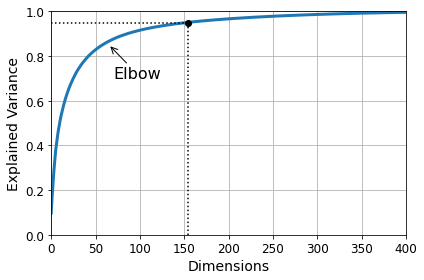

In [29]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

## PCA For Compression

"After dimensionality reduction, the training set takes up much less space."

"For example, try applying PCA to the MNIST dataset while preserving 95% of its variance.  
You should find that each instance will have just over 150 features, instead of  
the original 784 features. So, while most of the variance is preserved, the dataset is  
now less than 20% of its original size! This is a reasonable compression ratio, and you  
can see how this size reduction can speed up a classification algorithm (such as an  
SVM classifier) tremendously."
 
"The following code compresses the MNIST dataset down to 154 dimensions, then  
uses the inverse_transform() method to decompress it back to 784 dimensions:" 

In [33]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [34]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure mnist_compression_plot


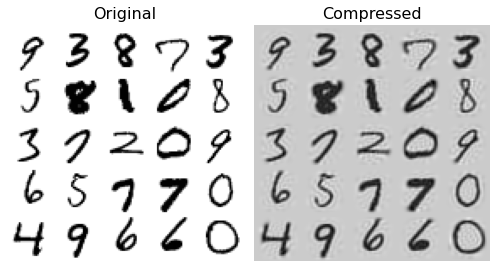

In [35]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

![title](images/pca_inv_1.png)


## Randomised PCA

"If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a stochastic   
algorithm called Randomized PCA that quickly finds an approximation of the   
first d principal components. Its computational complexity is O(m × d^2) + O(d^3),  
instead of O(m × n^2) + O(n^3) for the full SVD approach, so it is dramatically faster   
than full SVD when d is much smaller than n:"  

In [36]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

NOTE: "By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses the  
randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m  
or n, or else it uses the full SVD approach. If you want to force Scikit-Learn to use full  
SVD, you can set the svd_solver hyperparameter to "full"."

## Incremental PCA

"One problem with the preceding implementations of PCA is that they require the  
whole training set to fit in memory in order for the algorithm to run. Fortunately,  
Incremental PCA (IPCA) algorithms have been developed. They allow you to split the  
training set into mini-batches and feed an IPCA algorithm one mini-batch at a time."

"This is useful for large training sets and for applying PCA online (i.e., on the fly, as  
new instances arrive)."

"The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s  
array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class5 to  
reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like  
before). Note that you must call the partial_fit() method with each mini-batch,  
rather than the fit() method with the whole training set:"

In [37]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [38]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

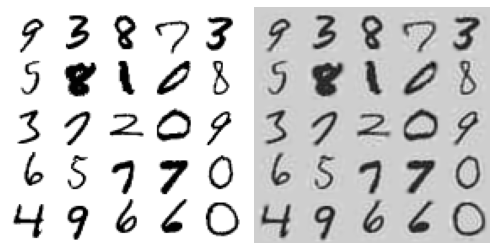

In [39]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

### Using Memap

"Alternatively, you can use NumPy’s memmap class, which allows you to manipulate a  
large array stored in a binary file on disk as if it were entirely in memory; the class  
loads only the data it needs in memory, when it needs it. Since the IncrementalPCA  
class uses only a small part of the array at any given time, the memory usage remains  
under control. This makes it possible to call the usual fit() method, as you can see  
in the following code:"

"Let's create the memmap() structure and copy the MNIST data into it. This would typically be done by a first program:"

In [40]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

"Now deleting the memmap() object will trigger its Python finalizer, which ensures that the data is saved to disk."

In [41]:
del X_mm

"Next, another program would load the data and use it for training:"

In [42]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

In [43]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

# Time Complexity

"If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a stochastic  
algorithm called Randomized PCA that quickly finds an approximation of the  
first d principal components. Its computational complexity is O(m × d2) + O(d3),  
instead of O(m × n2) + O(n3) for the full SVD approach, so it is dramatically faster  
than full SVD when d is much smaller than n:"

From SkLearn
"If the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled"

In [44]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for name, pca in (("PCA", regular_pca), ("Inc PCA", inc_pca), ("Rnd PCA", rnd_pca)):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(name, t2 - t1))

n_components = 2
    PCA: 3.8 seconds
    Inc PCA: 5.9 seconds
    Rnd PCA: 0.9 seconds
n_components = 10
    PCA: 3.9 seconds
    Inc PCA: 6.7 seconds
    Rnd PCA: 1.0 seconds
n_components = 154
    PCA: 3.7 seconds
    Inc PCA: 8.7 seconds
    Rnd PCA: 2.6 seconds


"Now let's compare PCA and Randomized PCA for datasets of different sizes (number of instances):"

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

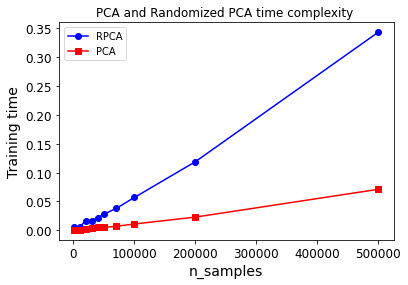

In [45]:

times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

"And now let's compare their performance on datasets of 2,000 instances with various numbers of features:"

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

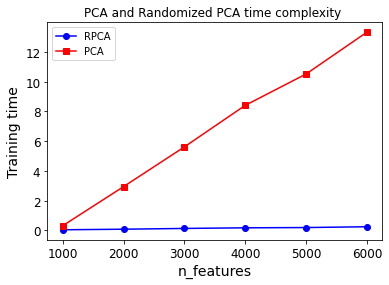

In [46]:

times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")